In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

# 데이터 시각화 및 모델 작성

In [18]:
df = pd.read_csv("data/house2/train.csv")
df.head(10)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
for column in df:
    print(df[column].nunique())    # nunique(): unique한 값들이 몇개 있는지

15035
365
3263
11
29
863
7678
6
2
5
5
12
789
271
116
65
70
4692
716
682
6958


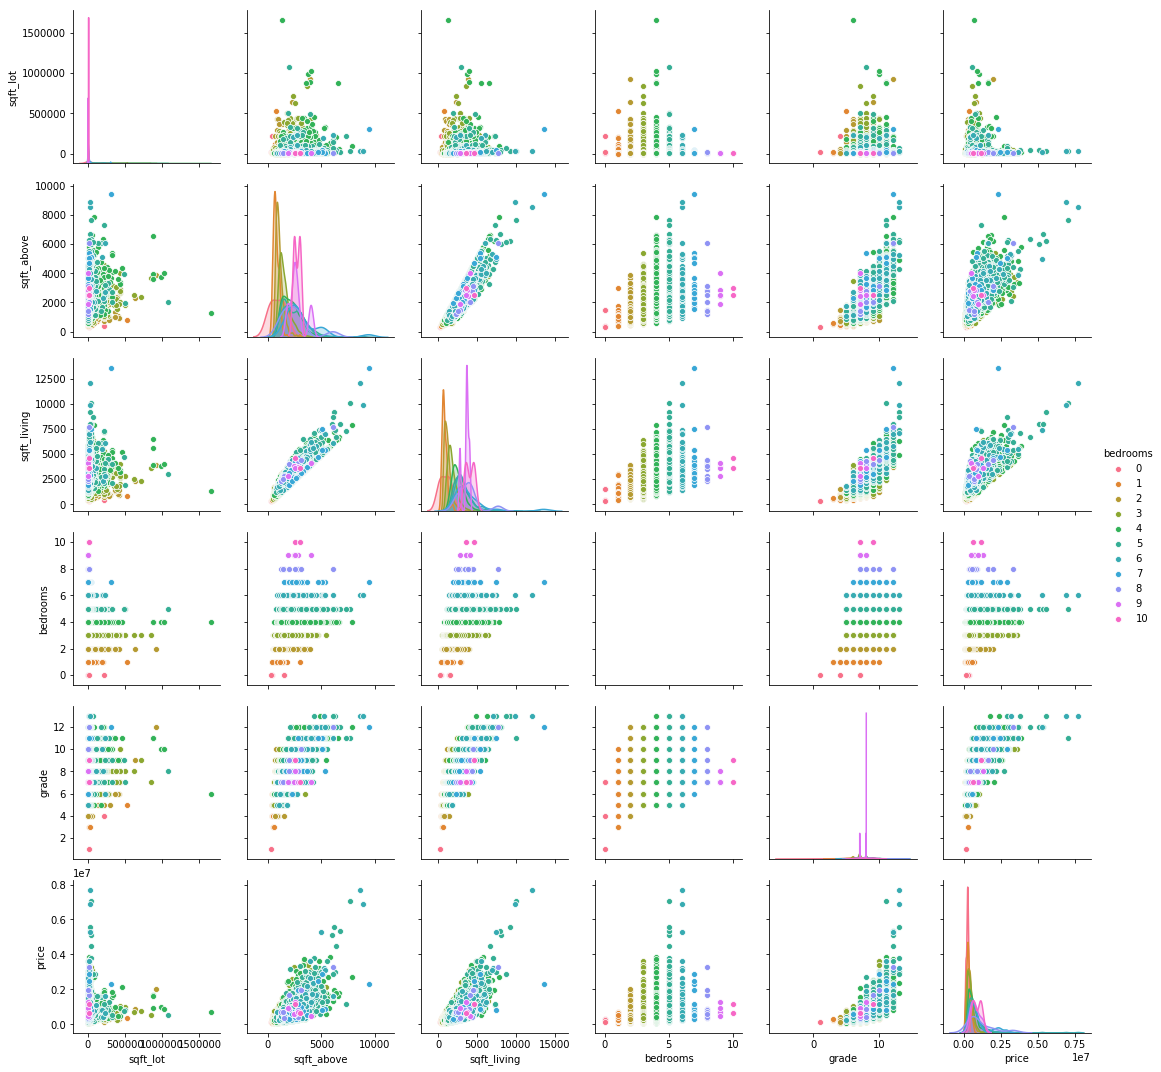

In [9]:
cols = ["sqft_lot", "sqft_above", "sqft_living", "bedrooms", "grade", "price"]
sns.plotting_context(font_scale=1.5)
sns.pairplot(df[cols], hue="bedrooms")

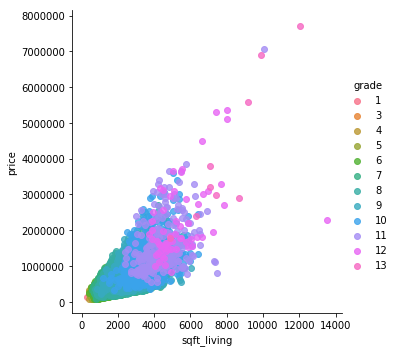

In [10]:
sns.lmplot(x="sqft_living", y="price", hue="grade", data=df, fit_reg=False)

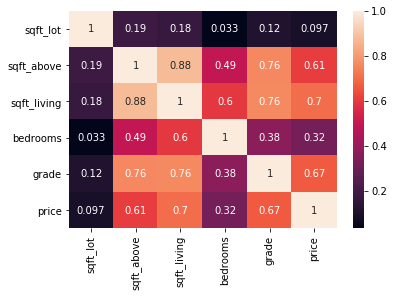

In [12]:
sns.heatmap(df[cols].corr(), annot=True)

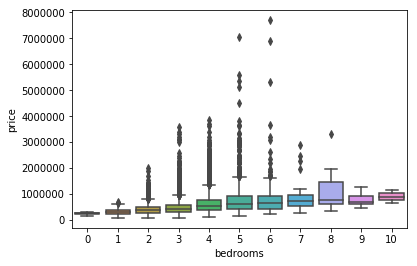

In [13]:
sns.boxplot(x=df["bedrooms"], y=df["price"])

[(0, 250000)]

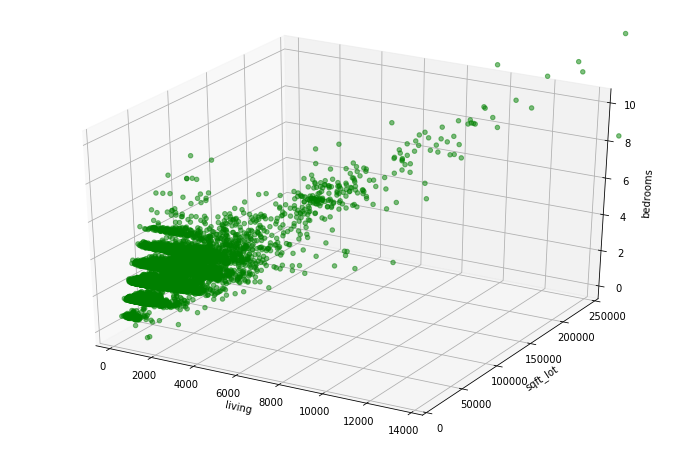

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# 방 갯수, 면적, 집 크기 => 시각화(3차원)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.scatter(df["sqft_living"], df["sqft_lot"], df["bedrooms"], c="green", alpha=.5)
ax.set(xlabel="living", ylabel="sqft_lot", zlabel="bedrooms")
ax.set(ylim=[0, 250000])

In [21]:
from sklearn.model_selection import train_test_split
train_df1, train_df2 = train_test_split(df, test_size=0.2, random_state=42)
train_df1.shape

(12028, 21)

In [23]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
model = LinearRegression()
model.fit(train_df1[["sqft_living"]], train_df1[["price"]])
# 모델 작성 끝

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# 회귀분석 모델 평가 (결정계수 R square를 통해)

실제값 - 예측값 = 잔차

잔차의 제곱의 합을 최소화하는 것이 목표

0 <= 결정계수 <= 1

결정계수(R2) = (Q-Qe)/Q
* Q: 전체 데이터의 편차 제곱의 합
* Qe: 전체 데이터의 잔차 제곱의 합

결정계수 = 설명력

결정계수가 0에 가까우면 (Qe가 Q에 가까우면) 설명력이 없는 것

LinearRegression 클래스의 score 함수를 이용해서 결정계수를 얻을 수 있다

In [29]:
score = model.score(train_df2[["sqft_living"]], train_df2[["price"]])    # 테스트 데이터의 결정계수
print(format(score, ".3f"))    # score를 float으로 소수점 세자리수까지 표시

0.484


In [30]:
predicted = model.predict(train_df2[["sqft_living"]])    # 테스트 데이터에 대한 prediction 결과
print(predicted)

[[368244.47878762]
 [493639.69539596]
 [348295.23978175]
 ...
 [305546.87048345]
 [476540.34767664]
 [308396.76177   ]]


In [31]:
print(model.intercept_)    # intercept = b = bias = 절편
print(model.coef_)    # coefficient = w = 계수 = 기울기

[-53539.43162226]
[[284.98912866]]


# 분류 모델에 대한 평가

분류 모델에 대한 평가는 회귀모델에 대한 평가가 아니다, 다르다

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
xtrue = [2, 0, 2, 2, 0, 1]
xpred = [0, 0, 2, 2, 0, 2]
confusion_matrix(xtrue, xpred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

* confusion matrix 해석
    * 행 인덱스가 actual number, 열 인덱스가 predicted number
    * 즉, 실제로 0인데 0으로 예측한 경우가 2건, 실제로 2인데 2로 예측한 경우가 2건, 실제로 2인데 0으로 예측한 경우가 1건, 실제로 1인데 2로 예측한 경우가 한건이라는 뜻

# 이진분류

이진분류(Pos/Neg)의 예: 불량품 분류기 (불량품: 양성, 정상품: 음성)
* TP: 불량품을 불량품으로 맞게 예측
* TN: 정상품을 정상품으로 맞게 예측
* FP: 정상품을 불량품으로 틀리게 예측
* FN: 불량품을 정상품으로 틀리게 예측

In [36]:
xtrue = [1, 0, 1, 1, 0, 1]
xpred = [0, 0, 1, 1, 0, 1]
confusion_matrix(xtrue, xpred)

array([[2, 0],
       [1, 3]], dtype=int64)

정확도 = (TP+TN) / (TP+TN+FP+FN)

정밀도 = TP / (TP+FP)

재현율 = TP(TP+FN)

F점수 = (2 * 정밀도 * 재현율) / (정밀도 + 재현율)

In [37]:
model.fit(train_df1[["sqft_living", "bedrooms", "bathrooms"]], train_df1[["price"]])
score = model.score(train_df2[["sqft_living", "bedrooms", "bathrooms"]], train_df2[["price"]])
print(format(score, ".3f"))

0.496


In [38]:
model.fit(train_df1[["sqft_living", "bedrooms", "bathrooms", "sqft_lot", "floors", "zipcode"]], train_df1[["price"]])
score = model.score(train_df2[["sqft_living", "bedrooms", "bathrooms", "sqft_lot", "floors", "zipcode"]], train_df2[["price"]])
print(format(score, ".3f"))

0.502


In [41]:
features = ["sqft_living", "bedrooms", "bathrooms", "sqft_lot", "floors", "zipcode", "view", "waterfront", "grade", "yr_built"]
model.fit(train_df1[features], train_df1[["price"]])
score = model.score(train_df2[features], train_df2[["price"]])
print(format(score, ".3f"))

0.657


# KNN (K Nearest Neighbor)

KNN: k개 만큼의 가까운 좌표를 구해서 원하는 값을 구하는 것

In [48]:
# knn 알고리즘 -> 예측
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=9)
model.fit(train_df1[features], train_df1["price"])
score = model.score(train_df2[features], train_df2["price"])
print(format(score, ".3f"))

0.501


## DecisionTreeRegressor

In [50]:
# DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(train_df1[features], train_df1["price"])
score = model.score(train_df2[features], train_df2["price"])
print(format(score, ".3f"))
predicted = model.predict(train_df2[features])
print(predicted)

0.577
[208000. 235000. 642000. ... 259000. 530000. 455000.]


# K-means

K-means: k개 만큼의 평균을 구해서 그룹핑(클러스터링). 비교사학습 알고리즘의 하나.

## Random Forest

In [51]:
# RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=27)
model.fit(train_df1[features], train_df1["price"])
score = model.score(train_df2[features], train_df2["price"])
print(format(score, ".3f"))
predicted = model.predict(train_df2[features])
print(predicted)

0.793
[298496.2962963  276498.14814815 559725.92592593 ... 339377.33333333
 506681.48148148 428766.66666667]


마지막에 만든 Random Forest 모델로 예측하기

In [55]:
testdf = pd.read_csv("data/house2/test.csv")
testdf.shape
predicted = model.predict(testdf[features])
ss = pd.read_csv("data/house2/sample_submission.csv")
ss["price"] = predicted
ss.to_csv("sub_file.csv", index=False)

# 성능에 대한 고민

성능을 올리려면?
1. 가중치를 둔다
2. 파생변수를 만든다
3. outlier를 처리한다
4. 연속형 변수를 구간화 (범주형으로) 할 필요가 있다 (원핫인코딩)
5. 컬럼 값을 표준화/정규화 한다
6. 딥러닝을 고려해본다
7. 앙상블 모델을 혼용한다

# Logistic Classification

예제 1

In [56]:
xdata = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
ydata = [[0], [0], [0], [1], [1], [1]]

In [57]:
x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])
w = tf.Variable(tf.random_normal([2, 1]), name="weight")
# 입력 속성 2개, 출력 결과 1개
b = tf.Variable(tf.random_normal([1]), name="bias")
# 출력 결과 1개

In [62]:
hf = tf.sigmoid(tf.matmul(x, w) + b)
cost = -tf.reduce_mean(y * tf.log(hf) + (1-y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [61]:
# 임계값 결정 => 0.5
predicted = tf.cast(hf > 0.5, dtype=tf.float32)    # tf.cast(): 첫번째 인자에 해당하는 것을 두번째 인자로 만들어준다
# tf.cast()의 두번째 인자에 dtype=tf.float32를 넣으면 True일때 1, False일때 0으로 바꿔준다
# 여기서 predicted가 이번 분류의 예측값이다

In [65]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [66]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv = sess.run([train, cost], feed_dict={x:xdata, y:ydata})
        if step % 200 == 0:
            print("step: %s, cost: %s" % (step, cv))
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print("hf = ", hv, "\npred = ", pv, "\naccuracy = ", av)

step: 0, cost: 1.728175
step: 200, cost: 0.68816966
step: 400, cost: 0.57443047
step: 600, cost: 0.52011204
step: 800, cost: 0.4875232
step: 1000, cost: 0.46400687
step: 1200, cost: 0.44486666
step: 1400, cost: 0.4281529
step: 1600, cost: 0.41297793
step: 1800, cost: 0.39890504
step: 2000, cost: 0.38570365
step: 2200, cost: 0.373242
step: 2400, cost: 0.36143792
step: 2600, cost: 0.35023487
step: 2800, cost: 0.33959004
step: 3000, cost: 0.3294681
step: 3200, cost: 0.31983808
step: 3400, cost: 0.31067201
step: 3600, cost: 0.30194375
step: 3800, cost: 0.29362866
step: 4000, cost: 0.2857036
step: 4200, cost: 0.27814674
step: 4400, cost: 0.27093711
step: 4600, cost: 0.26405522
step: 4800, cost: 0.2574826
step: 5000, cost: 0.25120154
step: 5200, cost: 0.2451957
step: 5400, cost: 0.2394497
step: 5600, cost: 0.23394887
step: 5800, cost: 0.22867955
step: 6000, cost: 0.22362898
step: 6200, cost: 0.21878505
step: 6400, cost: 0.21413644
step: 6600, cost: 0.20967275
step: 6800, cost: 0.20538396
ste

예제 2

In [79]:
xy = np.loadtxt("data/diabetes.csv", delimiter=",")
xdata = xy[:, :-1]
ydata = xy[:, [-1]]
xdata.shape    # (759, 8)
ydata.shape    # (759, 1)

(759, 1)

In [80]:
x = tf.placeholder(tf.float32, shape=[None, 8])
y = tf.placeholder(tf.float32, shape=[None, 1])
w = tf.Variable(tf.random_normal([8, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
hf = tf.sigmoid(tf.matmul(x, w) + b)
cost = -tf.reduce_mean(y * tf.log(hf) + (1-y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [81]:
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [83]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        cv, _ = sess.run([cost, train], feed_dict={x:xdata, y:ydata})
        if step % 200 == 0:
            print("step: %s, cost: %s" % (step, cv))
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print("hf: %s\nprediction: %s\naccuracy: %s" % (hv, pv, av))

step: 0, cost: 0.62597716
step: 200, cost: 0.6062178
step: 400, cost: 0.59430087
step: 600, cost: 0.5846032
step: 800, cost: 0.5761252
step: 1000, cost: 0.568589
step: 1200, cost: 0.56184953
step: 1400, cost: 0.55579865
step: 1600, cost: 0.55034626
step: 1800, cost: 0.54541606
step: 2000, cost: 0.5409428
step: 2200, cost: 0.5368708
step: 2400, cost: 0.5331524
step: 2600, cost: 0.52974665
step: 2800, cost: 0.52661824
step: 3000, cost: 0.5237368
step: 3200, cost: 0.5210758
step: 3400, cost: 0.51861256
step: 3600, cost: 0.51632684
step: 3800, cost: 0.5142014
step: 4000, cost: 0.51222104
step: 4200, cost: 0.51037204
step: 4400, cost: 0.50864255
step: 4600, cost: 0.5070221
step: 4800, cost: 0.5055014
step: 5000, cost: 0.5040721
step: 5200, cost: 0.50272673
step: 5400, cost: 0.5014587
step: 5600, cost: 0.500262
step: 5800, cost: 0.49913114
step: 6000, cost: 0.49806142
step: 6200, cost: 0.49704832
step: 6400, cost: 0.49608788
step: 6600, cost: 0.4951765
step: 6800, cost: 0.49431086
step: 7000